# Principal Component Analysis (PCA)

(PCA is another dimensionality reduction technique that finds linear combinations of the existing variables. It aims to create new features that maximize the explained variance.)

### Load the item data

In [1]:
# NumPy for numerical computing
import numpy as np

# Pandas for DataFrames
import pandas as pd
pd.set_option('display.max_columns', 100)

# Matplotlib for visualization
from matplotlib import pyplot as plt
# display plots in the notebook
%matplotlib inline 

# Seaborn for easier visualization
import seaborn as sns

# StandardScaler from Scikit-Learn
from sklearn.preprocessing import StandardScaler

# PCA from Scikit-Learn (added later)
from sklearn.decomposition import PCA

In [2]:
item_data = pd.read_csv('item_data.csv', index_col=0)

In [3]:
# item_data's shape
item_data.shape

(414, 2574)

### Item data PCA

In [4]:
# scale the data
scaler = StandardScaler()
item_data_scaled = scaler.fit_transform(item_data)
item_data_scaled[:5]

array([[-0.13303802, -0.04920678, -0.1119152 , ..., -0.10482848,
        -0.15568183, -0.68068072],
       [-0.13303802, -0.04920678, -0.1119152 , ..., -0.10482848,
        -0.15568183,  0.38776219],
       [-0.13303802, -0.04920678, -0.1119152 , ..., -0.10482848,
        -0.15568183, -0.41356999],
       [-0.13303802, -0.04920678, -0.1119152 , ..., -0.10482848,
        -0.15568183, -0.41356999],
       [-0.13303802, -0.04920678, -0.1119152 , ..., -0.10482848,
         5.53128397,  0.65487292]])

In [5]:
# PCA transformation
pca = PCA()
pca.fit(item_data_scaled)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [6]:
# generate new PCA features
PC_items = pca.transform(item_data_scaled)

# first 5 rows
PC_items[:5]

array([[  5.87614052e+00,   4.82891689e+00,  -4.95545069e-01, ...,
         -6.62646278e-04,  -4.43629806e-05,   6.81399381e-15],
       [ -4.21983747e+00,   1.22621722e+00,  -1.88191211e+00, ...,
         -2.11471782e-04,  -2.69154340e-04,  -3.67067488e-15],
       [ -1.26084676e+00,   2.38766371e+00,  -7.31483440e-02, ...,
          2.57750179e-04,  -2.05682324e-04,  -1.98625838e-15],
       [ -4.92931983e+00,  -7.14858724e-01,  -1.58093026e+00, ...,
         -1.98603886e-03,   9.92316312e-05,   3.72965547e-16],
       [ -2.05311348e+00,   2.11095022e+00,   1.84807021e-01, ...,
         -3.43415269e-04,  -1.32981672e-04,   3.96904731e-15]])

### Explained Variance

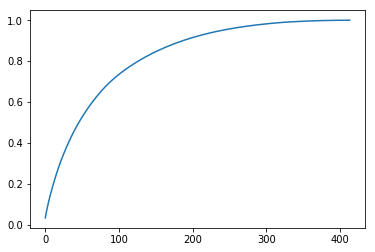

In [7]:
# cumulative explained variance
cumulative_explained_variance = np.cumsum(pca.explained_variance_ratio_)

# plot cumulative explained variance
plt.plot(range(len(cumulative_explained_variance)), cumulative_explained_variance)

In [8]:
cumulative_explained_variance[125]

0.79771648394418859

125 PCA features can explain 79.77% of the variance

### PCA transformation with only 125 components

In [9]:
pca = PCA(n_components=125)
PC_items = pca.fit_transform(item_data_scaled)
PC_items.shape

(414, 125)

### Put PC_items to a new dataframe

In [10]:
items_pca = pd.DataFrame(PC_items)

# name the columns
items_pca.columns = ['PC{}'.format(i + 1) for i in range(PC_items.shape[1])]

# update its index
items_pca.index = item_data.index

# first 5 rows
items_pca.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13,PC14,PC15,PC16,PC17,PC18,PC19,PC20,PC21,PC22,PC23,PC24,PC25,PC26,PC27,PC28,PC29,PC30,PC31,PC32,PC33,PC34,PC35,PC36,PC37,PC38,PC39,PC40,PC41,PC42,PC43,PC44,PC45,PC46,PC47,PC48,PC49,PC50,...,PC76,PC77,PC78,PC79,PC80,PC81,PC82,PC83,PC84,PC85,PC86,PC87,PC88,PC89,PC90,PC91,PC92,PC93,PC94,PC95,PC96,PC97,PC98,PC99,PC100,PC101,PC102,PC103,PC104,PC105,PC106,PC107,PC108,PC109,PC110,PC111,PC112,PC113,PC114,PC115,PC116,PC117,PC118,PC119,PC120,PC121,PC122,PC123,PC124,PC125
CustomerID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
12347,5.876137,4.828935,-0.495577,3.093811,-0.633736,-11.534198,2.161967,7.117038,5.336056,4.424549,4.637062,2.316710,12.311318,1.986851,-11.431047,5.618190,-2.177431,7.665981,-12.135738,-16.048723,-5.950295,7.813044,40.519614,-35.572918,-17.556976,6.869776,20.886647,2.296049,-26.163258,-32.577127,7.884097,12.356906,6.827739,-32.957991,-4.404379,-17.239738,-11.273255,-14.486988,-2.767362,4.735348,-6.985956,-1.462022,10.600264,1.238150,3.087728,5.337732,-0.413105,1.642647,-6.377244,3.074984,...,2.259384,2.514024,-0.949739,-1.756908,-1.893745,1.233983,0.529387,-1.294778,-2.152056,-3.482475,0.625572,-1.858445,0.665898,0.166590,1.149645,-1.827166,0.888027,0.409064,-0.367233,0.628479,-0.418556,-0.506453,0.027745,0.511525,-0.594990,-0.065224,1.184804,-0.669911,0.480065,-0.471834,0.352140,-0.750540,0.841184,0.730884,0.546927,0.485050,0.034618,-0.552985,0.350006,0.119397,0.800358,-0.465597,0.241071,-0.241904,0.222686,0.231430,0.455689,-0.401345,0.315547,-0.283115
12348,-4.219835,1.226222,-1.881847,-0.174291,0.817895,1.160775,-0.871611,-0.846863,0.460280,0.854325,-0.402000,0.981261,-1.104545,0.770006,-0.093126,-0.311915,-0.448806,1.207725,0.381306,-0.470859,0.187144,0.055000,0.499080,0.375380,1.226666,-0.773619,-0.272734,0.849919,-0.368749,-0.574340,1.011546,-0.577675,0.946590,-0.732688,0.355845,-0.383868,-0.297736,0.396369,0.158836,0.325836,-0.462349,0.699398,1.202520,-0.198906,-0.879278,-0.068951,-0.420124,-1.622069,-0.408993,0.458619,...,-0.987455,-0.861169,-0.422910,-0.435498,-0.137144,0.114570,-0.819584,-0.537938,0.713872,0.053352,0.284297,0.223282,-1.989738,-0.040525,-0.273965,-0.648757,-0.013423,0.816600,-0.690712,1.333890,-0.605698,0.085182,0.480599,1.489482,-0.174938,1.274056,-0.914448,-1.784455,-1.226970,-0.798389,1.146362,-0.672842,-0.903367,-1.062032,-1.517157,-0.792148,0.596656,-1.227578,-0.713006,0.425738,-2.190248,-0.251298,-0.682795,0.119773,-1.982126,-0.809825,-0.075804,-0.908797,-0.331597,0.502027
12349,-1.260832,2.387599,-0.073159,-1.118673,-0.034548,-3.715747,-0.343564,-0.148809,-0.790531,-0.379522,1.570410,0.183230,0.225685,-0.052077,3.179025,-0.513485,-1.839342,0.385649,0.321762,-0.005731,-0.422840,0.451726,-0.789155,1.752829,-1.476441,0.758949,-0.923066,0.767186,0.516383,-1.354502,0.284891,0.668260,0.084869,-0.209815,-0.681481,-1.563345,0.800852,-1.424388,-0.083935,-0.934829,0.078046,-0.085347,-0.135403,0.685941,1.385980,-0.228021,-0.062030,-0.184684,0.828004,1.708567,...,2.386858,-0.654530,1.617757,0.555128,1.273394,0.075853,-0.996345,0.973068,1.080983,-0.535622,2.046849,1.360743,-2.222754,-2.957794,0.144744,-2.222371,-1.597729,-2.341312,-1.968631,-1.119935,-0.206926,0.922232,0.559826,-0.530844,2.446865,-0.196279,0.011281,2.098077,2.911387,-2.481103,1.250599,-0.751900,-2.289395,-1.499979,-0.259309,-0.538619,1.778280,0.604381,2.079673,-0.000661,5.436085,1.361169,0.339340,0.112495,2.700313,0.906261,-3.134710,3.084243,2.965877,1.741108
12350,-4.929324,-0.714818,-1.580918,-0.469757,-0.116400,0.647786,0.112789,-1.336410,1.546931,-1.190005,-0.213314,1.057437,-0.474650,0.856876,-1.305207,0.242200,0.268306,1.952809,-0.227722,0.570351,-0.188725,0.903127,1.363858,0.178578,-0.260697,-0.167381,-0.683990,1.080464,-0.155701,-0.395501,0.243831,0.632601,-1.446474,-0.186183,-0.313199,-0.303362,-1.357424,-0.003413,0.583971,-0.250514,0.582831,-0.223642,0.282042,0.519986,-0.524252,-0.099877,-1.468281,0.125034,

### Save the PCA features

In [11]:
# Save pca_item_data.csv
items_pca.to_csv('pca_item_data.csv')